# Método de la transformada inversa: distribución de Poisson

Simule la ocurrencia de eventos en un proceso de Poisson de tasa $\lambda= 5/h$, hasta un tiempo T=3 h.

La distrbución de Poisson es una distribución de probabilidad discreta que expresa la probabilidad de que un número dado de eventos ocurran en un intervalo fijo de tiempo o espacio, si estos eventos ocurren con una tasa media constante conocida e independientemente del tiempo transcurrido desde el último evento.

Se dice que una variable aleatoria discreta X tiene una distribución de Poisson con parámetro $\mu> 0$, si, para k = 0, 1, 2, ..., la función de densidad de probabilidad de X está dada por:

$$p(X=k)=\frac{\mu^ke^{-\mu}}{k!}$$

donde k es el número de veces que ocurre un evento y $\mu$ el valor de expectación de la distribución.


Redefiniendo $\mu=\lambda . t$ la probabilidad del número de eventos k ocurra en t horas es:

$$p(X=k)=\frac{(\lambda t)^ke^{-\lambda t}}{k!}$$

Primero se realiza un programa que grafique la distribución de Poisson con $\mu=\lambda . t=5*3$ como el ejercicio indica, para luego poder compararla.

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
sns.set()

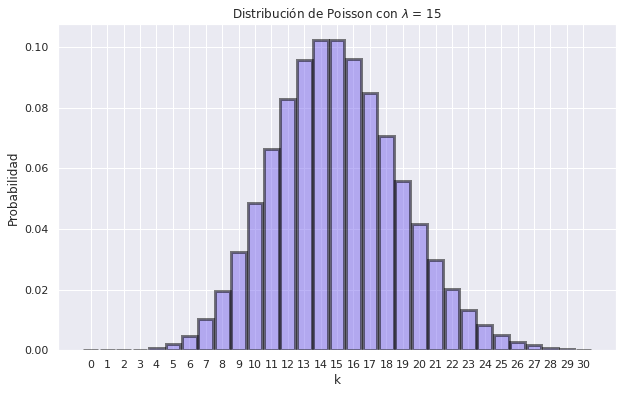

In [3]:
mu=15
kmax=30
def poisson():   
    k=range(0,kmax+1,1)
    y=[]
    for i in k:
        p=(mu**i)*(e**(-mu))/ factorial(i)
        y.append(p)
    return k, y
#
#Grafico:
plt.figure(figsize=(10,6))
k,y=poisson()
plt.bar(k,y, alpha=0.5, color='mediumslateblue', width=0.9, ec='black', lw=3)
plt.xticks(np.arange(0,kmax+1)) 
plt.title('Distribución de Poisson con $\lambda$ = %i '%mu)
plt.xlabel('k')
plt.ylabel('Probabilidad')
plt.show()

Para el caso de la distribución de Poisson, el intervalo de tiempo entre eventos consecutivos se puede modelar usando una distribución exponencial con parámetro $\lambda$, en este caso de valor igual a 5/h.

Sea X la variable aleatoria que representa el tiempo entre eventos, su función densidad de probabilidad está dada por:

$$f(x)=\lambda e^{-\lambda x}$$

Se quiere simular la ocurrencia de eventos en el proceso de Poisson usando esta distribución de los tiempos entre eventos.

Para ello se calcula su función distribución acumulada, la cual es de la forma:

$$F(x)=P(X\leq x)=1-e^{-\lambda x}$$


Utilizando el método de la función inversa, se pueden obtener números aleatorios distribuidos exponencialmente, generando números aleatorios uniformemente distribuidos U en [0,1] y eligiendo:

$$F^{-1}(u)= x= \frac{-log(1-u)}{\lambda}$$


La función $F_x^{-1}(u)$ genera el tiempo entre eventos consecutivos.
Para generar el tiempo en que se ocurre cada evento, se debe hacer una suma acumulada de cada uno.

*Se realiza el siguiente programa:*

Se crea una función 'tiempo3' en la cual se van a guardar la cantidad de eventos y la hora a la que ocurren. Dentro de ella se definen los intervalos de tiempo 'x' calculados por el método de la función inversa y se van sumando para formar los tiempos '$t_n$' que van a indicar el tiempo del evento n.
Como el ejercicio pide que los eventos ocurran hasta las 3 horas solamente, se indica que se corte cuando superan ese valor.

Luego se grafica para ver visualmente.

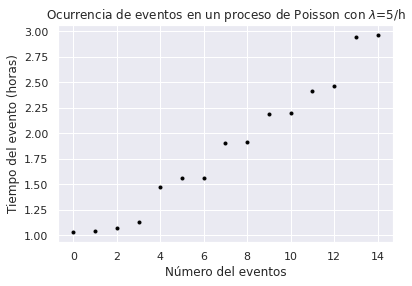

In [4]:
n=range(100)        #n representa al numero de eventos
def tiempo3(a=5):   #a representa a lambda
    tn = 0          #tiempo del evento inicial
    lista_n=[]      
    lista_tn=[]
    for j in n:
        u = random.random()  #random entre 0 y 1
        x = -log(1 - u)/a    #tiemppo entre eventos consecutivos
        tn=tn+x              #los voy sumando
        if tn<=3:
            lista_n.append(j)
            lista_tn.append(tn)
        else:
            break
    return lista_n, lista_tn
#
#Grafico
#plt.figure(figsize=(10,6))
N, t=tiempo3()
plt.plot(N,t,'.', color='black')
plt.title('Ocurrencia de eventos en un proceso de Poisson con $\lambda$=5/h')
plt.xlabel('Número del eventos')
plt.ylabel('Tiempo del evento (horas)')
plt.show()

Sea N el número de eventos entre 0 y 3hs.
Se sortea la función anterior varias veces hasta obtener distintos valores de N, luego se hace un histograma para conseguir la distribución de Poisson empírica producto de la simulación de los tiempos entre eventos.

Se grafica junto con la distribución teórica obtenida al principio para comparar.

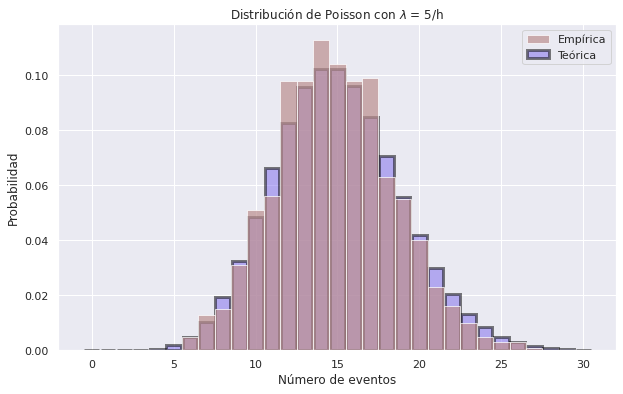

In [5]:
def funcion_n():
    lista=[]
    for i in range(1000):      #veces que orteo 1000 veces la función
        n3, t3=tiempo3()
        N_total=len(n3)        #guardo la cantidad de N de cada función
        lista.append(N_total)
    return lista
#
#Gráfico
plt.figure(figsize=(10,6))
#Comparo con la distribución teórica
plt.bar(k,y, alpha=0.5, color='mediumslateblue', width=0.9, ec='black', lw=3, label= 'Teórica')
#Función empírica:
N_final=funcion_n()
plt.hist(N_final, bins=np.arange(30), density=True, color='rosybrown', label= 'Empírica', alpha=0.7, align='left')
plt.title('Distribución de Poisson con $\lambda$ = 5/h')
plt.xlabel('Número de eventos')
plt.ylabel('Probabilidad')
plt.legend(loc='upper right')
plt.show()

## Conclusiones

En este ejercicio se pudo ver otra forma de obtener la distribución de Poisson, diferente a la manera teórica. Se utiliza el tiempo entre eventos, el cual sigue una distribución exponencial y se utiliza el método de la función inversa.
Se realiza esto varias veces para obtener un histograma de la distribución de Poisson.

Se llega a obtener distribuciones similares pero no iguales a la distribución teórica.